In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://raw.githubusercontent.com/pranavkotak8/Datasets/master/PopularKids.csv'
df1=pd.read_csv(path)

In [3]:
df1

,Gender,Grade,Age,Race,Urban/Rural,School,Goals,Grades,Sports,Looks,Money
0,'boy',5,11,'White','Rural','Elm','Sports',1,2,4,3
1,'boy',5,10,'White','Rural','Elm','Popular',2,1,4,3
2,'girl',5,11,'White','Rural','Elm','Popular',4,3,1,2
3,'girl',5,11,'White','Rural','Elm','Popular',2,3,4,1
4,'girl',5,10,'White','Rural','Elm','Popular',4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
473,'boy',6,11,'White','Urban','Westdale Middle','Grades',4,1,2,3
474,'boy',6,11,'White','Urban','Westdale Middle','Sports',4,1,2,3
475,'boy',6,11,'White','Urban','Westdale Middle','Grades',4,2,1,3
476,'boy',6,11,'White','Urban','Westdale Middle','Popular',4,1,3,2


In [4]:
# Finding the Missing Values
df1.isna().sum()/len(df1)

Gender         0.0
Grade          0.0
Age            0.0
Race           0.0
Urban/Rural    0.0
School         0.0
Goals          0.0
Grades         0.0
Sports         0.0
Looks          0.0
Money          0.0
dtype: float64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       478 non-null    object
 1   Grade        478 non-null    int64 
 2   Age          478 non-null    int64 
 3   Race         478 non-null    object
 4   Urban/Rural  478 non-null    object
 5   School       478 non-null    object
 6   Goals        478 non-null    object
 7   Grades       478 non-null    int64 
 8   Sports       478 non-null    int64 
 9   Looks        478 non-null    int64 
 10  Money        478 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 41.2+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


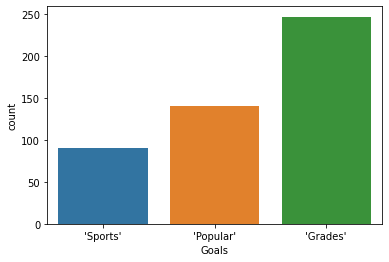

In [6]:
# Lets check out the Target Column
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df1['Goals'])
plt.show()

In [9]:
target=df1['Goals']

In [10]:
df1.drop(columns={'Goals'},inplace=True)

In [11]:
# Label Encoding the Categorical Columns
df_final=pd.get_dummies(df1)

In [12]:
df_final

,Grade,Age,Grades,Sports,Looks,Money,Gender_'boy',Gender_'girl',Race_'Other',Race_'White',Urban/Rural_'Rural',Urban/Rural_'Suburban',Urban/Rural_'Urban',School_'Brentwood Elementary',School_'Brentwood Middle',School_'Brown Middle',School_'Elm',School_'Main',School_'Portage',School_'Ridge',School_'Sand',School_'Westdale Middle'
0,5,11,1,2,4,3,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,5,10,2,1,4,3,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,5,11,4,3,1,2,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,5,11,2,3,4,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
4,5,10,4,2,1,3,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,6,11,4,1,2,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
474,6,11,4,1,2,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
475,6,11,4,2,1,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
476,6,11,4,1,3,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Grade                          478 non-null    int64
 1   Age                            478 non-null    int64
 2   Grades                         478 non-null    int64
 3   Sports                         478 non-null    int64
 4   Looks                          478 non-null    int64
 5   Money                          478 non-null    int64
 6   Gender_'boy'                   478 non-null    uint8
 7   Gender_'girl'                  478 non-null    uint8
 8   Race_'Other'                   478 non-null    uint8
 9   Race_'White'                   478 non-null    uint8
 10  Urban/Rural_'Rural'            478 non-null    uint8
 11  Urban/Rural_'Suburban'         478 non-null    uint8
 12  Urban/Rural_'Urban'            478 non-null    uint8
 13  School_'Brentwood El

In [14]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic=linear_model.LogisticRegression()
sgd=linear_model.SGDClassifier()

In [25]:
target=pd.DataFrame(target)

In [32]:
target.replace("'Sports'",1,inplace=True)
target.replace("'Popular'",2,inplace=True)
target.replace("'Grades'",3,inplace=True)

In [41]:
target.replace(1,0,inplace=True)
target.replace(2,1,inplace=True)
target.replace(3,2,inplace=True)

In [42]:
target

,Goals
0,0
1,1
2,1
3,1
4,1
...,...
473,2
474,0
475,2
476,1


In [43]:
# Splitting into trainset and testset in the ratio 80:20
seed=8
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_final,target,test_size=0.2,random_state=seed)

In [44]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logistic,X_train,y_train,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [45]:
np.mean(scores)

0.5391660970608338

In [46]:
scores_sgd=cross_val_score(sgd,X_train,y_train,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [47]:
np.mean(scores_sgd)

0.47611073137388915

In [48]:
# GridSearch CV on Logistic Regression
from sklearn.model_selection import GridSearchCV
gscv_log=GridSearchCV(logistic, {
                      'penalty': ['l1','l2','elasticnet'],
                      'C': [0.1,0.5,0.25,0.8,0.9,0.95,1.5,2.3,5.5],
                      'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}],
                      'solver' : ['liblinear', 'saga']
                      },cv=3,return_train_score=False,n_jobs=-1)

In [49]:
gscv_log.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.25, 0.8, 0.9, 0.95, 1.5, 2.3, 5.5],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [50]:
gscv_log.best_score_

0.5497457349081364

In [51]:
# Accuracy on the Test Set
from sklearn.metrics import accuracy_score
y_test_pred = gscv_log.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.5


In [52]:
# Performing Random Forest on the Dataset
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_test_pred_rf = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.4583333333333333


In [54]:
# Performing Neural Networks on the Dataset
# Importing the Necessary Libraries for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical

In [55]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [56]:
X_train.shape

(382, 22)

In [57]:

# Performing Neural Network on X_train and Y_train
model=Sequential()
model.add(Dense(units=580, activation='relu', input_dim=22))
model.add(Dense(units=2800, activation='relu'))
model.add(Dense(units=1041, activation='relu'))
model.add(Dense(units=2041))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history1=model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1,batch_size=128)

Epoch 1/100
3/3 [==============================] - 0s 161ms/step - loss: 2.4022 - accuracy: 0.4885 - val_loss: 1.0448 - val_accuracy: 0.5325
Epoch 2/100
3/3 [==============================] - 0s 90ms/step - loss: 1.0442 - accuracy: 0.5246 - val_loss: 0.9996 - val_accuracy: 0.5325
Epoch 3/100
3/3 [==============================] - 0s 88ms/step - loss: 1.0071 - accuracy: 0.5246 - val_loss: 0.9958 - val_accuracy: 0.5325
Epoch 4/100
3/3 [==============================] - 0s 93ms/step - loss: 0.9841 - accuracy: 0.5246 - val_loss: 0.9850 - val_accuracy: 0.5325
Epoch 5/100
3/3 [==============================] - 0s 90ms/step - loss: 0.9628 - accuracy: 0.5246 - val_loss: 0.9635 - val_accuracy: 0.5195
Epoch 6/100
3/3 [==============================] - 0s 90ms/step - loss: 0.9248 - accuracy: 0.5607 - val_loss: 1.0162 - val_accuracy: 0.5714
Epoch 7/100
3/3 [==============================] - 0s 87ms/step - loss: 0.9588 - accuracy: 0.5607 - val_loss: 0.9673 - val_accuracy: 0.5065
Epoch 8/100
3/3 [==

In [58]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 14ms/step - loss: 3.6498 - accuracy: 0.5312


[3.649791717529297, 0.53125]

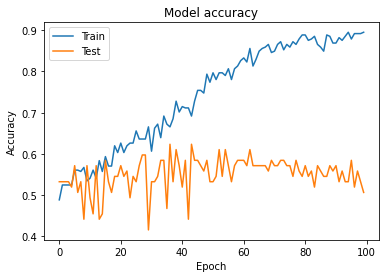

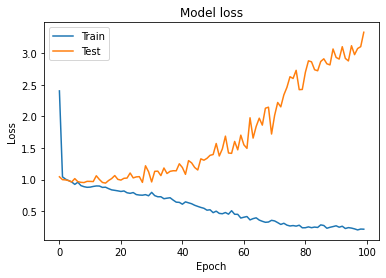

In [59]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()